Data analysis guide: 
https://towardsdatascience.com/a-practical-guide-for-data-analysis-with-pandas-e24e467195a9

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
PATH_TO_DATA1 = 'hackathon_data/avk_hackathon_data_account_x_balance.csv'
PATH_TO_DATA2 = 'hackathon_data/avk_hackathon_data_party_products.csv'
PATH_TO_DATA3 = 'hackathon_data/avk_hackathon_data_party_x_socdem.csv'
PATH_TO_DATA4 = 'hackathon_data/avk_hackathon_data_story_logs.csv'
PATH_TO_DATA5 = 'hackathon_data/avk_hackathon_data_story_texts.csv'
PATH_TO_DATA6 = 'hackathon_data/avk_hackathon_data_transactions.csv'

import json 
f = open('party_rk_top.json')
party_rk_top = json.load(f)

In [3]:
df1 = pd.read_csv(PATH_TO_DATA1)
df1 = df1[df1.party_rk.isin(party_rk_top)]
df1.head()


,party_rk,account_rk,prev_month,cur_month,balance_chng
2,33941,33065,2018-12-31,2019-01-31,-15000.0
3,9336,8611,2018-12-31,2019-01-31,-50000.0
10,718,550,2018-12-31,2019-01-31,45000.0
12,11063,53925,2018-12-31,2019-01-31,0.0
18,40618,57186,2018-12-31,2019-01-31,-90000.0


In [4]:
df1[df1.party_rk==51607]
print((df1.party_rk.unique().size),(df1.party_rk.unique().size)) 

7735 7735


In [5]:
df2 = pd.read_csv(PATH_TO_DATA2)
df2 = df2[df2.party_rk.isin(party_rk_top)]
df2.head()

,party_rk,product1,product2,product3,product4,product5,product6,product7
4,47253,0,0,0,1,1,0,0
5,84832,0,0,0,1,1,0,0
19,60144,0,0,0,1,0,0,0
22,90259,0,0,0,1,1,0,0
25,64148,0,1,0,0,1,0,0


In [6]:
df3 = pd.read_csv(PATH_TO_DATA3)
df3 = df3[df3.party_rk.isin(party_rk_top)]
df3.head()

,party_rk,gender_cd,age,marital_status_desc,children_cnt,region_flg
3,88238,F,35.0,NaN,0,0
7,24352,M,35.0,Женат/замужем,1,0
8,812,M,75.0,NaN,4,1
13,89849,M,35.0,Женат/замужем,0,0
14,12883,M,45.0,Женат/замужем,0,1


In [7]:
df3.marital_status_desc.value_counts()

Женат/замужем        2136
Холост/не замужем    1403
Разведен (а)          340
Гражданский брак      236
Вдовец, вдова          39
Name: marital_status_desc, dtype: int64

In [8]:
len(df3) - sum(df3.marital_status_desc.value_counts()) # Nan

3581

In [9]:
len(df3)

7735

In [10]:
df4 = pd.read_csv(PATH_TO_DATA4)
df4.date_time = pd.to_datetime(df4.date_time)
df4 = df4[df4.party_rk.isin(party_rk_top)]
df4.head()

,party_rk,date_time,story_id,category,event
9,48382,2019-12-10 12:06:47,3840,39,like
10,85548,2019-12-01 13:27:43,3846,39,like
13,46954,2019-12-01 14:08:50,3840,39,like
16,46954,2019-12-01 14:09:20,3857,39,like
22,74596,2019-12-01 14:38:45,3840,39,like


In [11]:
len(df4)

5381

In [12]:
df4.category.value_counts()

81    831
71    442
39    355
51    354
44    263
     ... 
23      1
56      1
21      1
42      1
77      1
Name: category, Length: 76, dtype: int64

In [13]:
df4.event.value_counts()

like        2311
favorite    2023
dislike      326
77]          207
14]          198
153           46
180           32
177           32
174           27
176           25
54]           23
164           21
48            21
19]           18
160           17
163           12
175           11
170            9
76             5
161            4
101]           3
159            3
182            3
102]           2
55]            2
Name: event, dtype: int64

In [14]:
dict(df4.story_id.value_counts())

{1342: 179,
 224: 91,
 3840: 68,
 192: 63,
 190: 44,
 2831: 42,
 265: 40,
 2018: 38,
 2327: 37,
 3978: 36,
 2592: 35,
 2397: 34,
 1949: 34,
 2544: 33,
 174: 31,
 3250: 30,
 2759: 27,
 3432: 26,
 2981: 26,
 349: 26,
 3307: 25,
 2637: 24,
 3155: 24,
 2407: 24,
 2404: 23,
 3172: 23,
 3818: 22,
 2858: 22,
 2784: 22,
 3631: 21,
 2399: 21,
 3930: 21,
 851: 21,
 2204: 21,
 2405: 20,
 2775: 20,
 3579: 20,
 3739: 20,
 3943: 20,
 2205: 19,
 2773: 18,
 3847: 18,
 1825: 18,
 3491: 18,
 2990: 17,
 2227: 17,
 2664: 17,
 2389: 17,
 3268: 16,
 2356: 16,
 2211: 16,
 4084: 15,
 2341: 15,
 2972: 15,
 3260: 15,
 2246: 15,
 3224: 15,
 2121: 14,
 3097: 14,
 1699: 14,
 3334: 14,
 2374: 14,
 2879: 14,
 2589: 14,
 3837: 14,
 3857: 14,
 3352: 14,
 2322: 14,
 2512: 13,
 3550: 13,
 3370: 13,
 3687: 13,
 2390: 13,
 3758: 13,
 2285: 13,
 3846: 13,
 617: 12,
 2579: 12,
 2594: 12,
 2284: 12,
 3174: 12,
 3033: 12,
 2247: 12,
 3365: 12,
 2175: 11,
 3917: 11,
 1086: 11,
 3844: 11,
 2525: 11,
 3386: 11,
 2051: 11,
 2630:

In [15]:
df5 = pd.read_csv(PATH_TO_DATA5)
df5.head()

,story_id,name,story_text
0,794,Профессия: свадебный организатор,"["""",""Как стать свадебным организатором"",""Это Л..."
1,821,Бизнес: магазин электроники,"["""",""Как открыть интернет-магазин электроники""..."
2,824,Как у них: Сингапур,"["""",""Жизнь в Сингапуре"",""Это Славина. Вместе с..."
3,839,Студии йоги,"["""",""Студии йоги"",""7 московских студий, где мо..."
4,848,Как получать больше кэшбэка,"["""",""Как получать больше кэшбэка"",""Подключите ..."


In [16]:
df6 = pd.read_csv(PATH_TO_DATA6)
df6.transaction_dttm = pd.to_datetime(df6.transaction_dttm)
df6 = df6[df6.party_rk.isin(party_rk_top)]
df6.head()

,party_rk,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
0,20337,19666,1,2019-01-01,Покупка,84.00,88676.0,348.0,NaN,Сувениры
2,24789,23517,2,2019-01-01,Покупка,701.44,830014.0,291.0,NaN,Супермаркеты
3,57970,64838,2,2019-01-01,Покупка,6203.70,363834.0,278.0,454.0,Дом/Ремонт
12,56812,63010,2,2019-01-01,Покупка,1695.00,988289.0,346.0,100.0,Разные товары
23,21861,20802,2,2019-01-01,Снятие наличных,5000.00,439054.0,380.0,NaN,Наличные


In [17]:
df_with_category = df5.set_index('story_id').join(df4[['story_id', 'category']].set_index('story_id')).drop_duplicates()
df_with_category[df_with_category.category==4]

,name,story_text,category
story_id,,,
216,В отпуск бесплатно,"["""",""Как летать в отпуск бесплатно"",""Поможет к...",4.0
545,Продукты банка для друзей,"["""",""Что посоветовать друзьям"",""Выберите проду...",4.0
731,Страховка в путешествии,"["""",""Зачем нужна страховка путешественника"",""П...",4.0
1187,Бюджетные путешествия,"["""",""Идеи для бюджетных путешествий"",""Будапешт...",4.0
1525,Расскажите банку о поездке,"["""",""Путешествия"",""Зачем банку знать о вашей п...",4.0
1534,Важное про ОСАГО,"["""",""Страхование"",""Что нужно знать про ОСАГО"",...",4.0
1546,Зачем ехать в Тель-Авив,"["""",""Зачем ехать в Тель-Авив"",""Хумус, авангард...",4.0
1565,Справка для консульства,"["""","" Путешествия"",""Как подготовить справку о ...",4.0


In [18]:
pd.set_option('display.max_rows', None)
df_with_category.sort_values('category')


,name,story_text,category
story_id,,,
2918,Русская керамика,"["""",""Посуда от русских керамистов"",""Рассказыва...",1.0
876,Повысьте статус карты,"["""",""Поменяйте свою карту на премиальную в оди...",2.0
3494,NaN,"["""",""Как узаконить автотюнинг"",""Ездить с незар...",2.0
3709,Необычный спорт,"["""",""4 необычных вида спорта,font_name:Montser...",2.0
265,6 правил кредитки,"["""",""6 правил пользования кредиткой"",""Которые ...",2.0
3287,NaN,"["""",""Мгновенная компенсация за задержку рейса""...",2.0
256,Счет или вклад?,"["""",""Чем накопительный счет отличается от вкла...",2.0
614,Риелтор для сделки,"["""",""Где найти риелтора, чтобы купить квартиру...",2.0
3184,Страховка в поездке,"["""",""Как устроена страховка для путешествий"",""...",2.0


In [19]:
pd.set_option('display.max_rows', 10)

In [124]:

certain_story_id = 2664
certain_category_story_id = 51
df5[df5.story_id==certain_story_id]

,story_id,name,story_text
683,2664,NaN,"["""",""Европротокол в Тинькофф Страховании"",""Что..."


In [125]:
dict(df5[df5.story_id==certain_story_id].story_text)

{683: '["","Европротокол в\xa0Тинькофф Страховании","Что такое европротокол? ","Это упрощенный порядок оформления небольших ДТП\xa0— с\xa0ним не\xa0придется ждать инспекторов ГИБДД. Европротокол действует по\xa0всей России. Даже\xa0если машина стоит на\xa0учете в\xa0Москве, а\xa0авария произошла во\xa0Владивостоке, вы\xa0все равно можете им\xa0воспользоваться.","Когда действует европротокол?","Должны совпасть все\xa0условия:\\\\\\\\n1. Место ДТП\xa0— Россия. \\\\\\\\n2. В\xa0ДТП попали только две\xa0машины. \\\\\\\\n3. Пострадали только автомобили. \\\\\\\\n4. У\xa0участников нет разногласий по\xa0обстоятельствам\xa0ДТП.\\\\\\\\n5. У\xa0всех есть полисы ОСАГО, и\xa0они\xa0действуют.\\\\\\\\n6. Затраты на\xa0ремонт не\xa0превысят 100\xa0000\xa0₽.","Как оформить европротокол?","Понадобится специальный бланк\xa0— извещение о\xa0ДТП. В\xa0нем нужно подробно описать все\xa0повреждения автомобилей и\xa0обстоятельства аварии. Для\xa0определения размера вмятин и\xa0царапин можно использовать к

In [126]:
df5[df5.story_id==1997]

,story_id,name,story_text
295,1997,Кредитка без комиссии,"["""",""Когда не стоит платить кредиткой"",""Операц..."


In [127]:
df5[df5.story_id==3840]    

,story_id,name,story_text
1418,3840,Новый год с Тинькофф,"["""",""Адвент-календарь Тинькофф уже запущен,fon..."


In [128]:
df4_=df4.set_index('party_rk')
df4_=df4_[df4_.event.isin(['like', 'favorite'])]

In [129]:
dttms_of_story = pd.to_datetime(df4_.date_time[df4_.category==certain_category_story_id])

In [130]:
dttms_of_story_frame = dttms_of_story.to_frame(name='dttm')

In [131]:
dttms_of_story_frame

,dttm
party_rk,
8049,2019-12-02 18:33:44
36915,2019-11-15 17:35:43
26510,2019-09-26 20:54:19
25159,2019-12-26 19:23:56
3252,2019-12-16 22:20:27
...,...
66389,2019-07-11 15:40:16
81798,2019-08-12 02:00:34
93847,2019-05-23 14:46:07


In [132]:
liked_party = df4[df4.event.isin(['like', 'favorite'])] 

In [133]:
liked_party = liked_party[liked_party.category==certain_category_story_id]

In [134]:
liked_party

,party_rk,date_time,story_id,category,event
54,8049,2019-12-02 18:33:44,3837,51,favorite
232,36915,2019-11-15 17:35:43,3365,51,like
266,26510,2019-09-26 20:54:19,3363,51,favorite
375,25159,2019-12-26 19:23:56,4045,51,favorite
399,3252,2019-12-16 22:20:27,3365,51,like
...,...,...,...,...,...
13769,66389,2019-07-11 15:40:16,2923,51,favorite
13783,81798,2019-08-12 02:00:34,2830,51,like
13801,93847,2019-05-23 14:46:07,2562,51,favorite
13802,66389,2019-05-23 15:07:53,2609,51,like


In [135]:
liked_party.party_rk.value_counts()

34650    33
66389    25
15495    11
41491    11
52998    10
         ..
87435     1
44423     1
47331     1
13034     1
87883     1
Name: party_rk, Length: 128, dtype: int64

In [136]:
table_with_trans = df6[df6.party_rk.isin(list(liked_party.party_rk))]

In [137]:
table_with_trans.party_rk.value_counts()

13034    998
7312     996
41491    973
30816    969
41734    965
        ... 
88518    146
90299    116
2240      70
87256     60
89582     44
Name: party_rk, Length: 128, dtype: int64

In [138]:
table_with_trans.set_index('party_rk')

,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
party_rk,,,,,,,,,
56812,63010,2,2019-01-01,Покупка,1695.00,988289.0,346.0,100.0,Разные товары
58132,65247,2,2019-01-01,Покупка,4790.00,430389.0,286.0,1324.0,Супермаркеты
11646,9834,2,2019-01-03,Покупка,11.00,912524.0,244.0,NaN,Связь/Телеком
10195,9503,2,2019-01-04,Покупка,304.57,234212.0,286.0,878.0,Супермаркеты
52998,57365,2,2019-01-04,Платеж,1329.00,1126180.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32168,30987,2,2019-12-30,Покупка,240.00,2396397.0,313.0,261.0,Одежда/Обувь
66389,77593,2,2019-12-31,Снятие наличных,10100.00,1101721.0,380.0,1043.0,Наличные
52998,57365,2,2019-12-31,Покупка,1009.00,500552.0,313.0,362.0,Одежда/Обувь


In [139]:
table_with_trans = table_with_trans.set_index('party_rk').join(dttms_of_story_frame)
# df.set_index('key').join(other.set_index('key'))


In [140]:
table_with_trans['differ'] = table_with_trans.dttm.values.astype(np.int64) // 10 ** 9

In [141]:
from tqdm import tqdm
for index, row in tqdm(table_with_trans.iterrows()):
    table_with_trans.loc[index,'differ'] = table_with_trans.loc[index, 'transaction_dttm'].astype(np.int64) // 10 ** 9 - table_with_trans.loc[index,'differ']

228383it [15:07, 251.71it/s]


In [142]:
one_week = table_with_trans[table_with_trans.differ<604801]

In [143]:
one_month = table_with_trans[table_with_trans.differ<2592000]

In [144]:
len(one_week)

41771

In [145]:
len(one_month)

46664

Text(0, 0.5, '# of records')

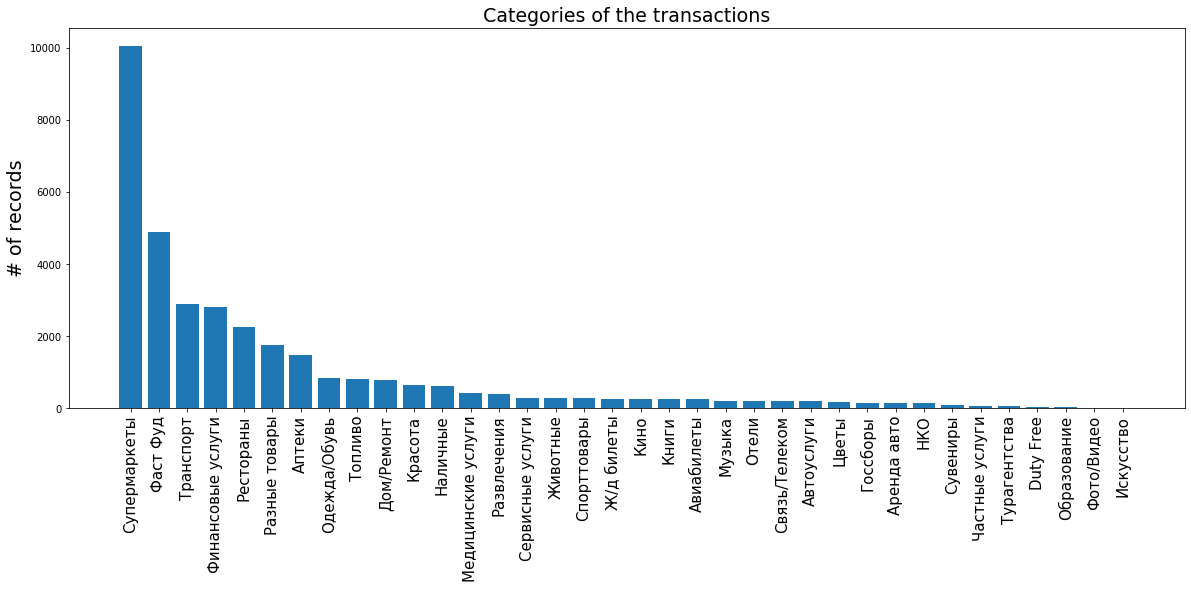

In [146]:
categories = dict(one_week.category.value_counts())
plt.figure(figsize=(20, 7))
plt.bar(categories.keys(), categories.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Categories of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

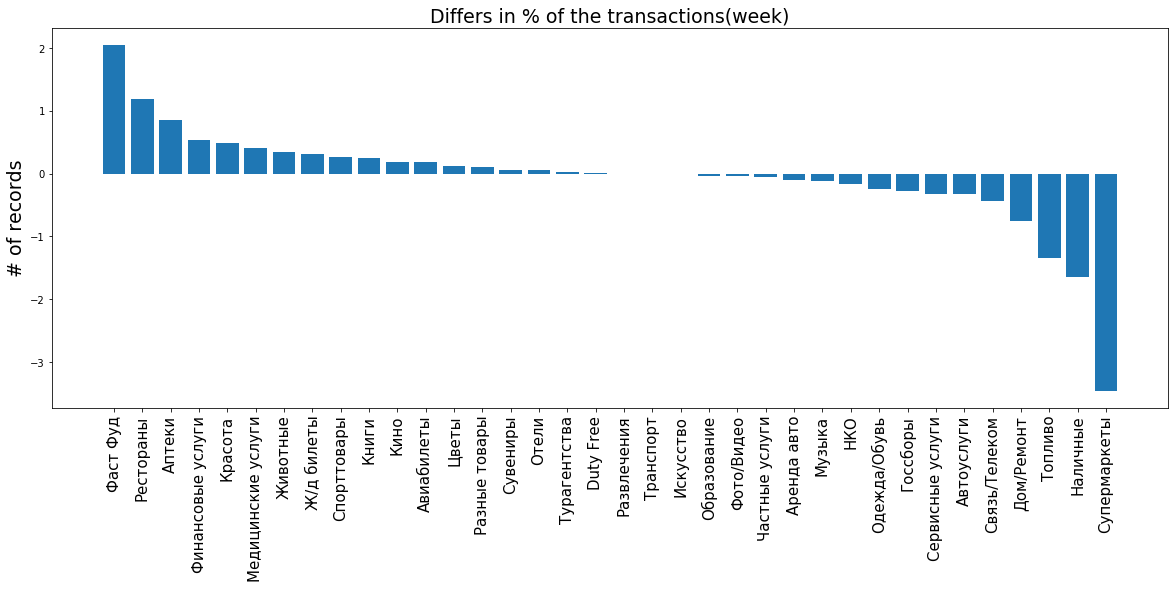

In [147]:
dict_of_transactions_all = {}
dict_of_transactions = {}
dict_of_differs = {}
categories = dict(df6.category.value_counts())
categories_one = dict(one_week.category.value_counts())
len_of_all = len(df6.category)
len_of_one = len(one_week.category)
for key, value in zip(categories_one.keys(), categories_one.values()):
    dict_of_transactions_all[key] = round(categories[key] / len_of_all, 4)*100
    dict_of_transactions[key] = round(categories_one[key]/len_of_one, 4)*100
    dict_of_differs[key] = -dict_of_transactions_all[key] + dict_of_transactions[key]
    
sort_orders = sorted(dict_of_differs.items(), key=lambda x: x[1], reverse=True)
import collections

sorted_dict = collections.OrderedDict(sort_orders)
plt.figure(figsize=(20, 7))
plt.bar(sorted_dict.keys(), sorted_dict.values())
# plt.plot(sorted_dict.keys(), np.zeros(len(sorted_dict)), c='b')
plt.xticks(rotation='vertical', size=15);
plt.title('Differs in % of the transactions(week)', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

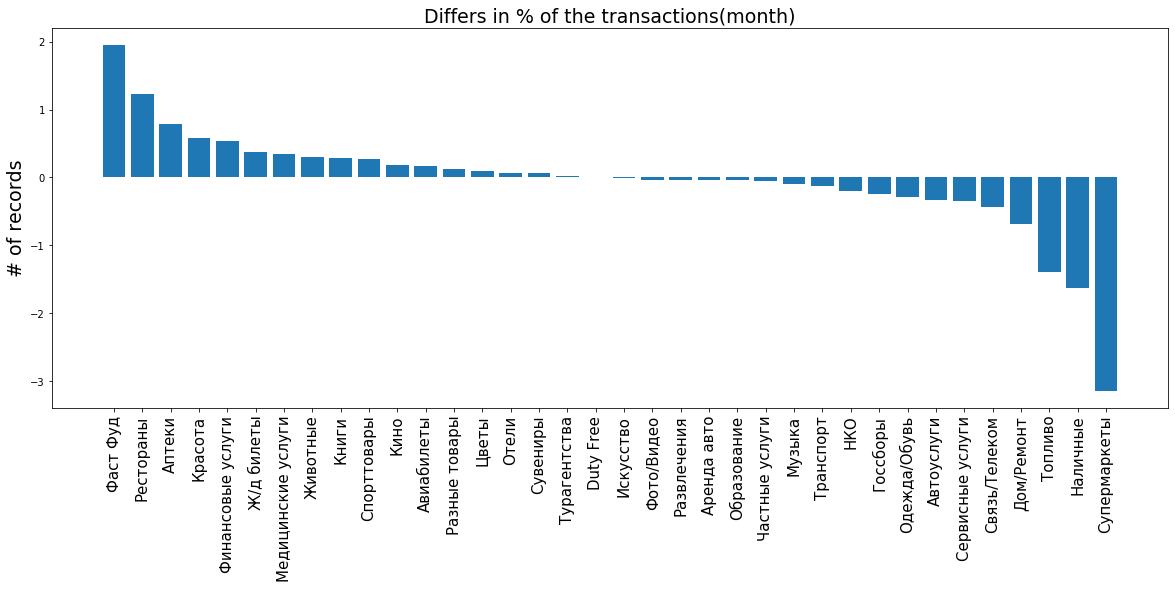

In [148]:
dict_of_transactions_all = {}
dict_of_transactions = {}
dict_of_differs = {}
categories = dict(df6.category.value_counts())
categories_one = dict(one_month.category.value_counts())
len_of_all = len(df6.category)
len_of_one = len(one_month.category)
for key, value in zip(categories_one.keys(), categories_one.values()):
    dict_of_transactions_all[key] = round(categories[key] / len_of_all, 4)*100
    dict_of_transactions[key] = round(categories_one[key]/len_of_one, 4)*100
    dict_of_differs[key] = -dict_of_transactions_all[key] + dict_of_transactions[key]
    
sort_orders = sorted(dict_of_differs.items(), key=lambda x: x[1], reverse=True)
import collections

sorted_dict = collections.OrderedDict(sort_orders)
plt.figure(figsize=(20, 7))
plt.bar(sorted_dict.keys(), sorted_dict.values())
# plt.plot(sorted_dict.keys(), np.zeros(len(sorted_dict)), c='b')
plt.xticks(rotation='vertical', size=15);
plt.title('Differs in % of the transactions(month)', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

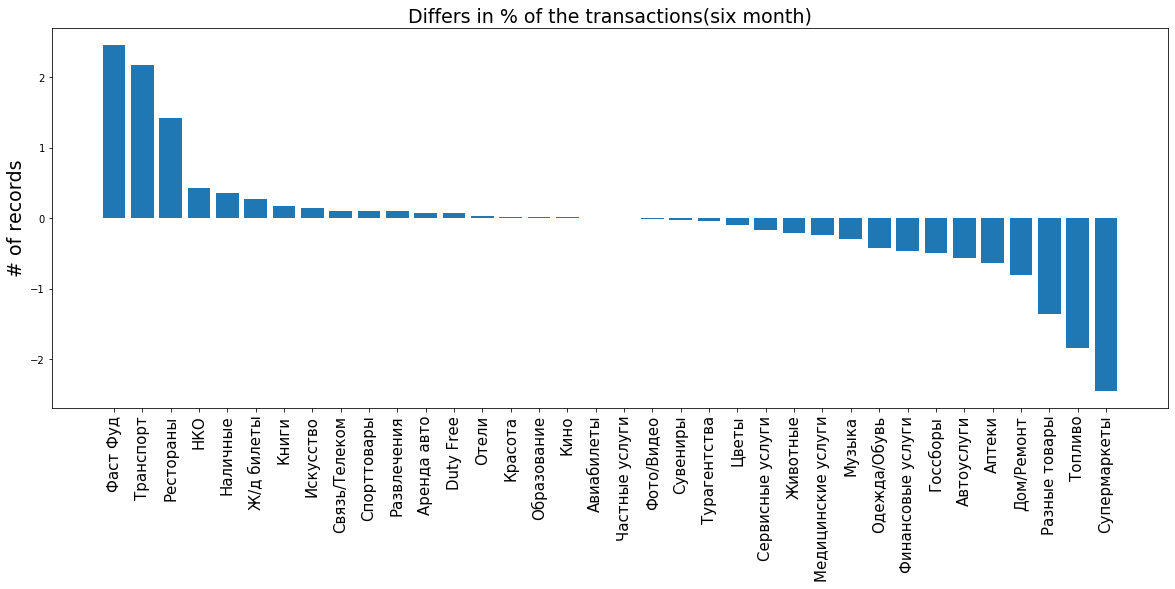

In [149]:
dict_of_transactions_all = {}
dict_of_transactions = {}
dict_of_differs = {}
categories = dict(df6.category.value_counts())
categories_one = dict(six_month.category.value_counts())
len_of_all = len(df6.category)
len_of_one = len(six_month.category)
for key, value in zip(categories_one.keys(), categories_one.values()):
    dict_of_transactions_all[key] = round(categories[key] / len_of_all, 4)*100
    dict_of_transactions[key] = round(categories_one[key]/len_of_one, 4)*100
    dict_of_differs[key] = -dict_of_transactions_all[key] + dict_of_transactions[key]
    
sort_orders = sorted(dict_of_differs.items(), key=lambda x: x[1], reverse=True)
import collections

sorted_dict = collections.OrderedDict(sort_orders)
plt.figure(figsize=(20, 7))
plt.bar(sorted_dict.keys(), sorted_dict.values())
# plt.plot(sorted_dict.keys(), np.zeros(len(sorted_dict)), c='b')
plt.xticks(rotation='vertical', size=15);
plt.title('Differs in % of the transactions(six month)', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

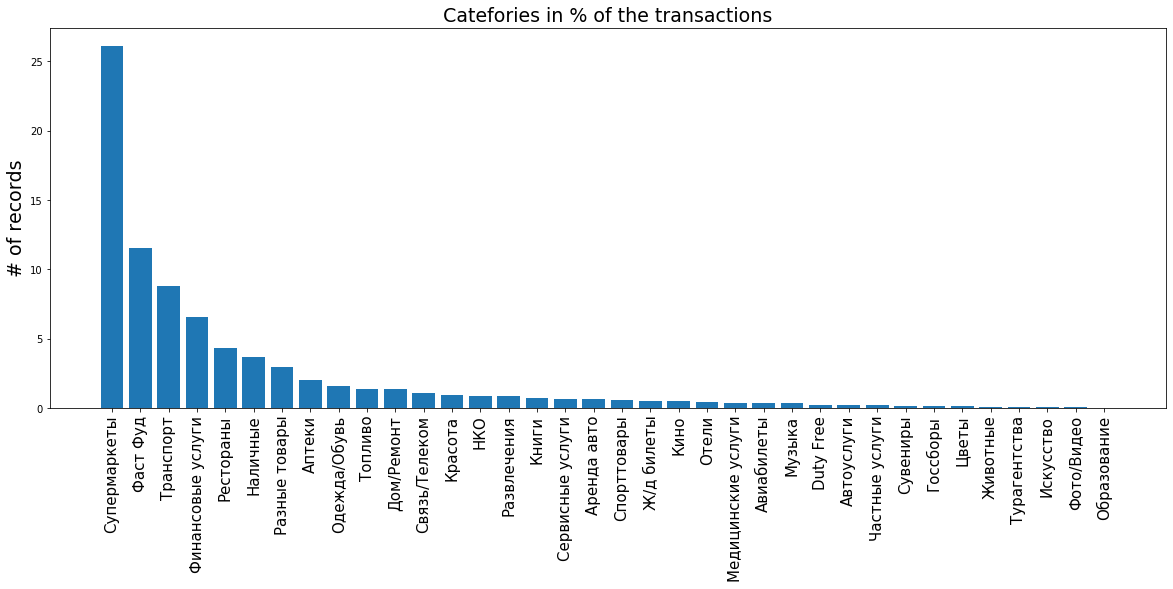

In [119]:
plt.figure(figsize=(20, 7))
plt.bar(dict_of_transactions.keys(), dict_of_transactions.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Catefories in % of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

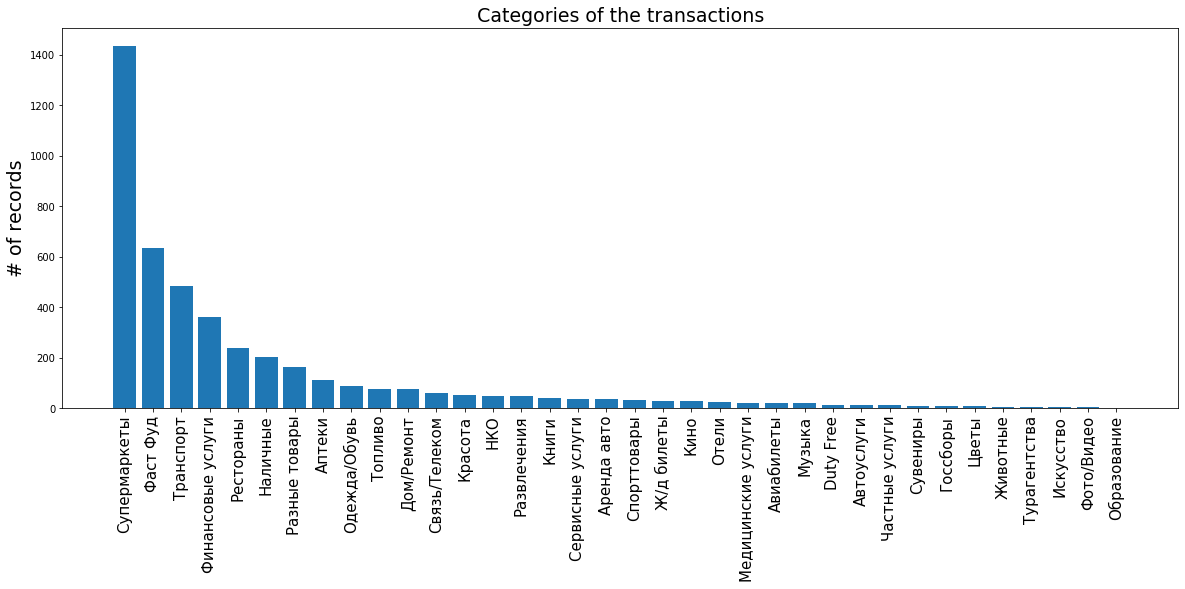

In [121]:
categories = dict(one_month.category.value_counts())
plt.figure(figsize=(20, 7))
plt.bar(categories.keys(), categories.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Categories of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

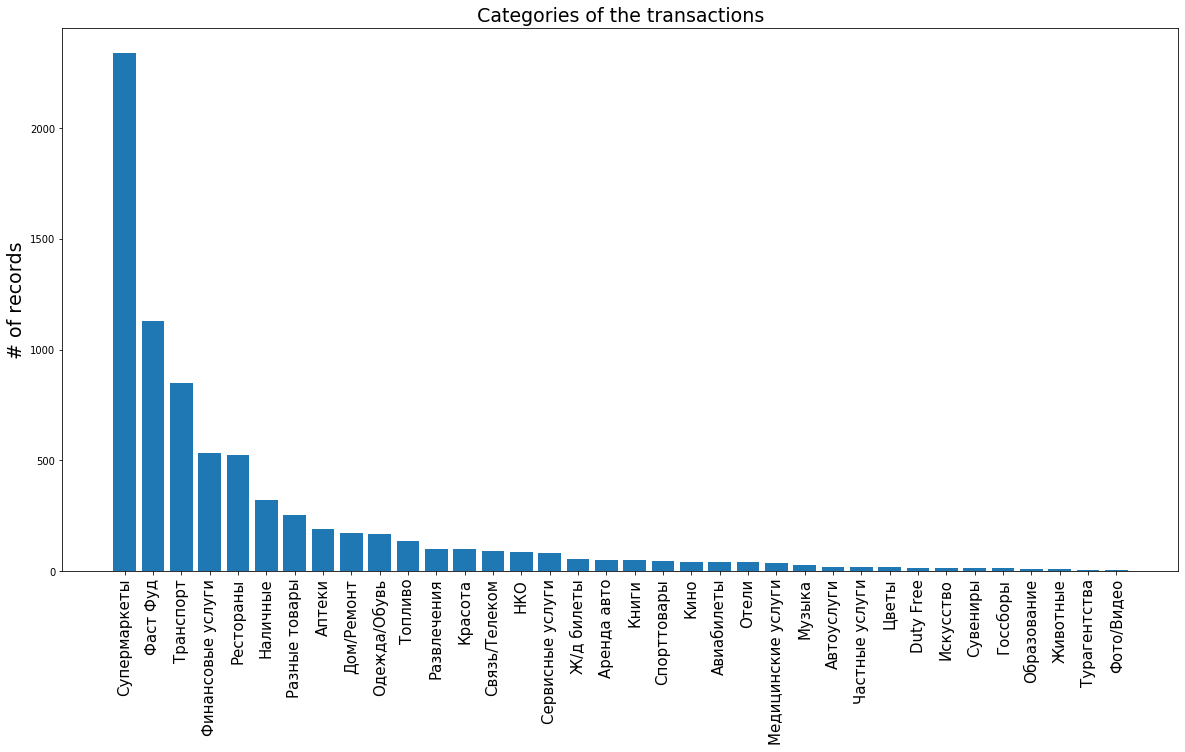

In [122]:
six_month = table_with_trans[table_with_trans.differ<2592000*6]
categories = dict(six_month.category.value_counts())
plt.figure(figsize=(20, 10))
plt.bar(categories.keys(), categories.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Categories of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

In [52]:
len(six_month)

1184

In [53]:
df6.category.value_counts()

Супермаркеты         998593
Фаст Фуд             349960
Транспорт            251407
Финансовые услуги    224184
Рестораны            152478
                      ...  
Образование            3444
Турагентства           3320
Duty Free              3085
Фото/Видео             2230
Искусство               868
Name: category, Length: 36, dtype: int64

In [54]:
len(df6.category.value_counts())

36

In [55]:
(pd.to_datetime(df6.transaction_dttm))

0          2019-01-01
2          2019-01-01
3          2019-01-01
12         2019-01-01
23         2019-01-01
              ...    
11987601   2019-12-31
11987606   2019-12-31
11987611   2019-12-31
11987614   2019-12-31
11987616   2019-12-31
Name: transaction_dttm, Length: 3626871, dtype: datetime64[ns]

In [60]:
mydict = dict(df6.transaction_dttm.value_counts())

In [69]:
def datestr2int(datestring):
    d = dt.datetime.strptime(datestring, '%Y-%m-%d %H:%M:%S')
    if d.minute >= 30:
        d = d + dt.timedelta(minutes=30)
    else:
        pass
    s = dt.datetime.strftime(d, '%m%d%H')
    return int(s)

In [70]:
keylist = mydict.keys()
import time
from datetime import datetime

a = []
b = []
for key in sorted(mydict):
    print ("%s: %s" % (key, mydict[key]))
    a.append(int(time.mktime(key.timetuple())))
    b.append(mydict[key])

2019-01-01 00:00:00: 28354
2019-01-02 00:00:00: 21538
2019-01-03 00:00:00: 10341
2019-01-04 00:00:00: 25454
2019-01-05 00:00:00: 17847
2019-01-06 00:00:00: 18002
2019-01-07 00:00:00: 6929
2019-01-08 00:00:00: 34561
2019-01-09 00:00:00: 22396
2019-01-10 00:00:00: 22918
2019-01-11 00:00:00: 19968
2019-01-12 00:00:00: 24650
2019-01-13 00:00:00: 19238
2019-01-14 00:00:00: 9097
2019-01-15 00:00:00: 42707
2019-01-16 00:00:00: 20291
2019-01-17 00:00:00: 22681
2019-01-18 00:00:00: 24358
2019-01-19 00:00:00: 21440
2019-01-20 00:00:00: 22336
2019-01-21 00:00:00: 9114
2019-01-22 00:00:00: 41211
2019-01-23 00:00:00: 21753
2019-01-24 00:00:00: 24891
2019-01-25 00:00:00: 23037
2019-01-26 00:00:00: 23639
2019-01-27 00:00:00: 21045
2019-01-28 00:00:00: 9123
2019-01-29 00:00:00: 44972
2019-01-30 00:00:00: 19909
2019-01-31 00:00:00: 24111
2019-02-01 00:00:00: 25144
2019-02-02 00:00:00: 23010
2019-02-03 00:00:00: 23072
2019-02-04 00:00:00: 8964
2019-02-05 00:00:00: 44831
2019-02-06 00:00:00: 22004
2019-0

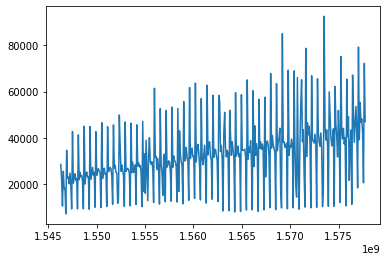

In [71]:
import matplotlib.pyplot as plt
plt.plot(a,b)

Text(0, 0.5, '# of records')

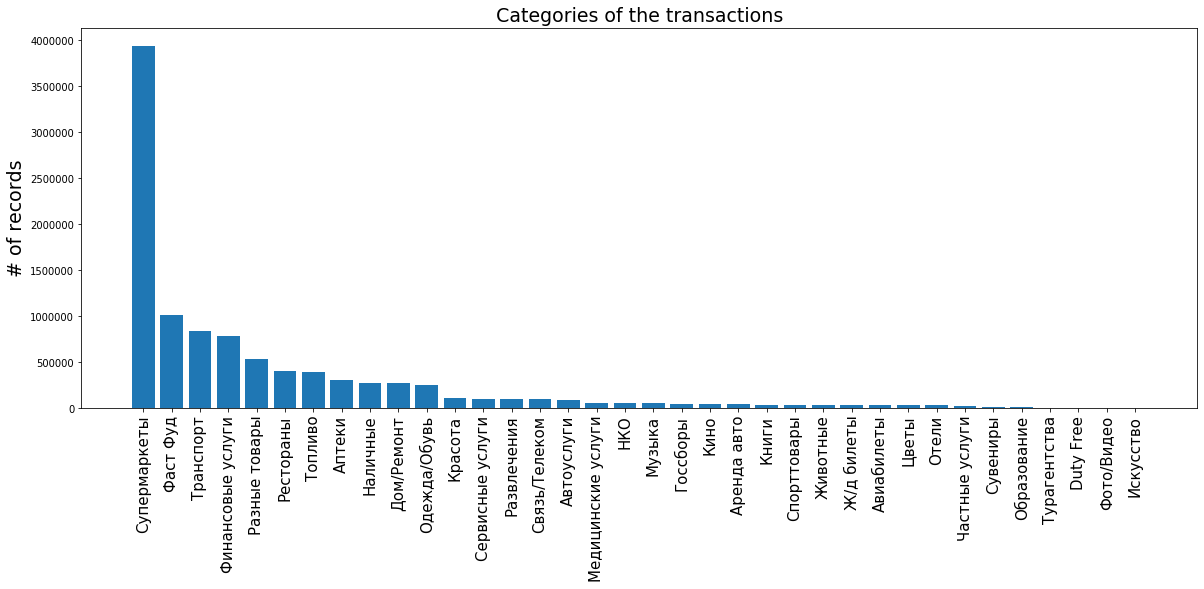

In [514]:
categories = dict(df6.category.value_counts())
plt.figure(figsize=(20, 7))
plt.bar(categories.keys(), categories.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Categories of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

Text(0, 0.5, '# of records')

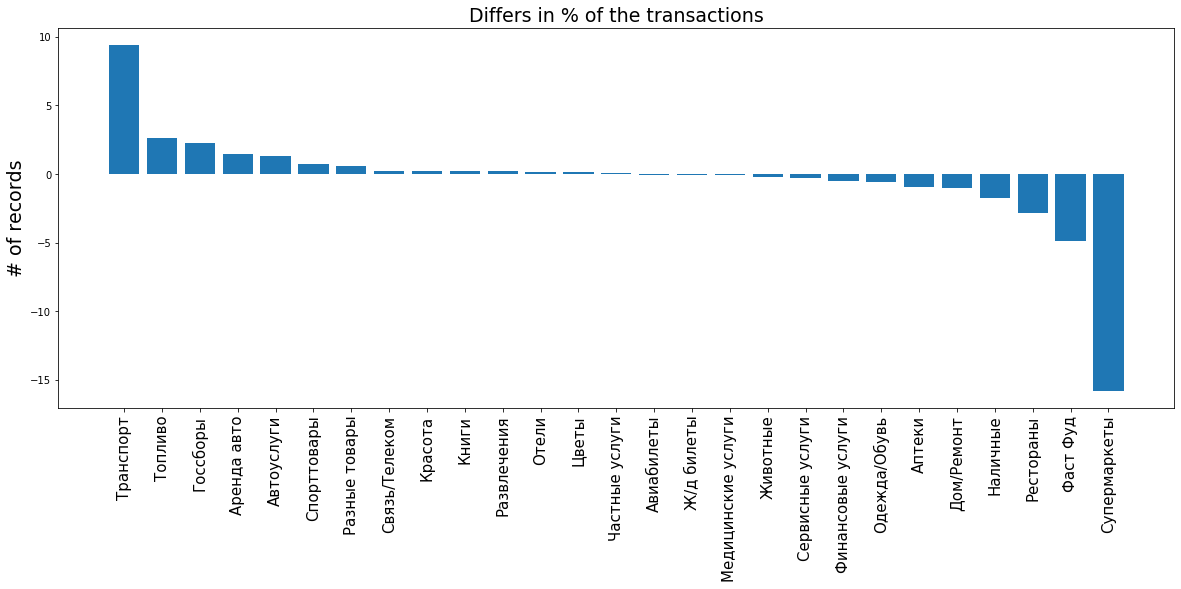

In [539]:
sort_orders = sorted(dict_of_differs.items(), key=lambda x: x[1], reverse=True)
import collections

sorted_dict = collections.OrderedDict(sort_orders)
plt.figure(figsize=(20, 7))
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation='vertical', size=15);
plt.title('Differs in % of the transactions', fontsize=19)
plt.ylabel('# of records', fontsize=19)

In [272]:
df4.head()

,party_rk,date_time,story_id,category,event
0,64266,2019-12-01 13:05:31,3840,39,like
1,55721,2019-12-01 13:18:08,3857,39,like
2,27563,2019-12-01 13:25:40,3174,78,like
3,61223,2019-12-01 13:25:20,3857,39,like
4,61223,2019-12-01 13:29:05,3765,73,like


In [503]:
df_with_category = df5.set_index('story_id').join(df4[['story_id', 'category']].set_index('story_id')).drop_duplicates()

,name,story_text,category
story_id,,,
216,В отпуск бесплатно,"["""",""Как летать в отпуск бесплатно"",""Поможет к...",4.0
545,Продукты банка для друзей,"["""",""Что посоветовать друзьям"",""Выберите проду...",4.0
731,Страховка в путешествии,"["""",""Зачем нужна страховка путешественника"",""П...",4.0
1187,Бюджетные путешествия,"["""",""Идеи для бюджетных путешествий"",""Будапешт...",4.0
1525,Расскажите банку о поездке,"["""",""Путешествия"",""Зачем банку знать о вашей п...",4.0
1534,Важное про ОСАГО,"["""",""Страхование"",""Что нужно знать про ОСАГО"",...",4.0
1546,Зачем ехать в Тель-Авив,"["""",""Зачем ехать в Тель-Авив"",""Хумус, авангард...",4.0
1565,Справка для консульства,"["""","" Путешествия"",""Как подготовить справку о ...",4.0


,name,story_text,category
story_id,,,
2918,Русская керамика,"["""",""Посуда от русских керамистов"",""Рассказыва...",1.0
876,Повысьте статус карты,"["""",""Поменяйте свою карту на премиальную в оди...",2.0
3494,NaN,"["""",""Как узаконить автотюнинг"",""Ездить с незар...",2.0
3709,Необычный спорт,"["""",""4 необычных вида спорта,font_name:Montser...",2.0
265,6 правил кредитки,"["""",""6 правил пользования кредиткой"",""Которые ...",2.0
3287,NaN,"["""",""Мгновенная компенсация за задержку рейса""...",2.0
256,Счет или вклад?,"["""",""Чем накопительный счет отличается от вкла...",2.0
614,Риелтор для сделки,"["""",""Где найти риелтора, чтобы купить квартиру...",2.0
3184,Страховка в поездке,"["""",""Как устроена страховка для путешествий"",""...",2.0
